In [155]:
import numpy as np
import matplotlib.pyplot as plt

# Производная

**Средняя скорость изменения функции** $f(x)$ на промежутке $[x, x+\Delta x]$ 

$$
\frac{\Delta f}{\Delta x} = \frac{f(x+\Delta x)-f(x)}{\Delta x}
$$
$\Delta f$ - Приращение функции \
$\Delta x$ - Приращение аргумента 

-----

**Производная** - **Мгновенная скорость изменения функции** $f(x)$ от изменения его аргумента $x$ в конкретной точке: \
Конкретная точка моделируется как промежуток $[x, x+\Delta x]$ ) при $\Delta x \rightarrow 0$ \
То есть приращение аргумента $\Delta x$ на такое значение которым можно принебречь \
Насколько сильно и в каком направлении изменяется $f(x)$ если $x$ изменить на незначительное приращение 
$$
f'(x) = \frac{\partial f}{\partial x} = \lim_{\Delta x \rightarrow 0}\frac{f(x+\Delta x)-f(x)}{\Delta x}
$$
**Геометрический смысл** - Прямая проходящая через 2 взятые на графике функции $f(x)$ точки $x$ и $x+\Delta x$ образует секущую.\
При устремлении $\Delta x$ к нулю - Секущая сводится к касательной. \
Производная функции в этой точке будет равна угловому коэффициенту касательной $k$\
$k=tg\alpha=\frac{\Delta f}{\Delta x}$\
(Отношение противолежащего катета к прилежащему) \
$\Delta f$ - противолежащая сторона, $\Delta x$ - прилежащая сторона

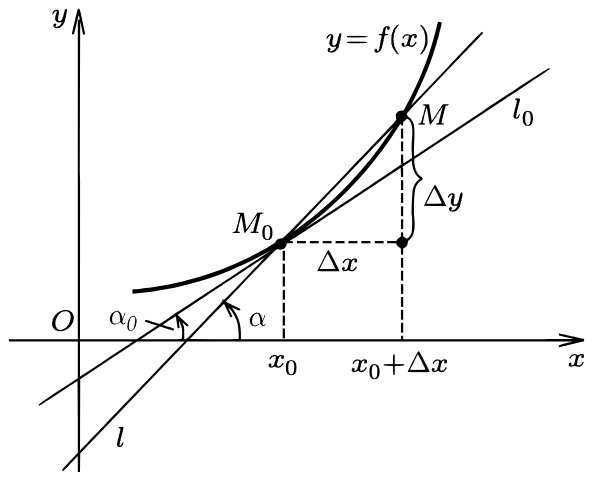

## Градиент

**Градиент** - Вектор частных производных. Показывает направление наискорейшего роста функции.\
**Частная производная** - производная функции нескольких аргументов по одному из её аргументов. Все остальные аргументы фиксируются как константы
$$
f(x, y, z, ...)
$$

$$
\nabla f = \Big{(}\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z}\Big)
$$
***Градиент показывает, в какую сторону функция растёт быстрее всего (направление скорости роста)***

Пример:
$$
f(x, y, z) = 3x^2 +5xy^2 +4x^2yz + 3x^3z
$$

$$
\frac{\partial f}{\partial x} = 6x+5y^2+8xyz+9x^2z
$$
$$
\frac{\partial f}{\partial y} = 10xy+4x^2z
$$
$$
\frac{\partial f}{\partial z} = 4x^2y+3x^3
$$

$$
\nabla f(x,y,z) = (6x+5y^2+8xyz+9x^2z, 10xy+4x^2z, 4x^2y+3x^3)
$$

# Производная второго порядка

**Вторая производная** — Мгновенная скорость изменения самой скорости изменения функции \
Предел отношения приращения первой производной к приращению аргумента $x$ при $\Delta x \rightarrow 0$ \
Первая производная показывает, как быстро меняется значение функции при изменении аргумента \
Вторая производная показывает, как быстро ускоряется или замедляется это изменение.

$$
f''(x) = \frac{\partial f}{\partial x}\frac{\partial f}{\partial x} = \frac{\partial^2 f}{\partial x^2}
$$
Степень обозначает порядок производной а не квадрат ( Сколько раз берет производная )

В смешенных случаях порядок следования $\partial$ в знаменателе отражает порядок взятия производных ( сначала производная по $x$, затем от неё производная по $y$ )
$$
f''(x) = \frac{\partial^2 f}{\partial x{\partial y}}
$$

## Гессиан

**Гессиан** - Матрица $n$*$n$ вторых производных функции $f(x_1, x_2,..x_n)$ \
Матрица Гессе формируется из частных производных по каждому из $n$ исходных аргументов функции для каждого компонента градиента.
$$
H(f)=
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \cdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}
$$
Показывает, насколько быстро и в каком направлении меняется скорость изменения многомерной функции.

----

In [138]:
import sympy as sp
from sympy import symbols, sympify, diff, hessian

x,y,z=symbols('x y z')

f = 3*x**2 + 5*x*y**2 + 4*x**2*y*z + 3*x**3*z

grad = diff(f, x), diff(f, y), diff(f, z)
display(grad)

hess = hessian(f, (x, y, z))
display(hess)

⎡                                     2        ⎤
⎢18⋅x⋅z + 8⋅y⋅z + 6  8⋅x⋅z + 10⋅y  9⋅x  + 8⋅x⋅y⎥
⎢                                              ⎥
⎢                                         2    ⎥
⎢   8⋅x⋅z + 10⋅y         10⋅x          4⋅x     ⎥
⎢                                              ⎥
⎢      2                    2                  ⎥
⎣   9⋅x  + 8⋅x⋅y         4⋅x            0      ⎦

In [150]:
# Преобразуем в функцию
grad_function = sp.lambdify((x, y, z), grad, modules='numpy')
hess_function = sp.lambdify((x,y,z), hess, modules='numpy')

def gradient(x,y,z):
    return np.array(grad_function(x, y, z))

display(gradient(1,1,1))
display(hess_function(1,1,1))

array([28, 14,  7])

array([[32, 18, 17],
       [18, 10,  4],
       [17,  4,  0]])

# Ряд Тейлора

## Ряд Маклорена 